# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [55]:
%%shell
jupyter nbconvert --to html /content/food-hub-kimberly-magerl.ipynb

[NbConvertApp] Converting notebook /content/food-hub-kimberly-magerl.ipynb to html
[NbConvertApp] Writing 370300 bytes to /content/food-hub-kimberly-magerl.html


In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Great Learning/Project 1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# return the number of rows and columns 
df.shape

(1898, 9)

#### Observations: 
* The data has 1,898 rows and 9 columns. Each row is a delivered order.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# return a summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 

*  There are 4 columns of data type integer, 4 columns of data type string (object), and 1 column of data type numerical float. 

*   All the columns have 1,898 observations. No columns have null values.
*  Order_id and customer_id are categorical variables but represented with numerical labels.
*   Rating should be numerical data type.





In [6]:
# convert order_id and customer_id to object data type
df = df.astype({"order_id": object, "customer_id": object})

# confirm conversion of order_id and customer_id
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


###Observations
*   Order_id and customer_id have been changed to the object data type and are now categorical variables.


In [7]:
# check entries in rating to determine what is preventing a numerical category
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

###Observations
*   'Not given' is preventing the data from being numerical.


In [8]:
# replace 'not given' with 0 as the representation
df['rating'] = df['rating'].replace(['Not given'],0)

# change rating to data type float
df = df.astype({"rating": float})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 133.6+ KB


In [9]:
# check entries to ensure 0 has replaced 'not given'
df['rating'].unique()

array([0., 5., 3., 4.])

###Observations
*   'Not given" has been replaced with 0
*   Rating has been reassigned as type float
*   Rating is represented as numerical data
*   The new entries for rating are: 0, 5, 3, 4





### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# check df for the count of null values (missing values) in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* There are no null values in the data set. 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# describe the data set df
df.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1898.000000,1898.000000,1898.000000
mean,16.498851,2.659642,27.371970,24.161749
std,7.483812,2.195280,4.632481,4.972637
min,4.470000,0.000000,20.000000,15.000000
25%,12.080000,0.000000,23.000000,20.000000
50%,14.140000,4.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


#### Observations:
*   The minimum food preparation time is 20.0 minutes.
*   The average food preparation time is 27.37 minutes.
*   The maximum food preparation time is 35.0 minutes.





### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# check counts for rating, not rated orders are represented as 0
df['rating'].value_counts()

0.0    736
5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

#### Observations: 
*   Zero denotes 'not given'
*   There are 736 unrated orders. 




### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [13]:
# explore Order ID and find the number of unique values
df['order_id'].nunique()

1898

###Observations


*   There are 1,898 unique order ID's. 



In [14]:
# explore Customer ID and find the number of unique values
df['customer_id'].nunique()

1200

###Observations


*  There are 1,200 unique customer ID's.
* Some customers have used FoodHub's delivery service more than once.



In [15]:
# explore Restaurant Name and find the number of unique values
df['restaurant_name'].nunique()

178

###Observations
*   There are 178 unique restaurants.



In [16]:
# explore Cuisine Type and find the number of unique values
df['cuisine_type'].nunique()

14

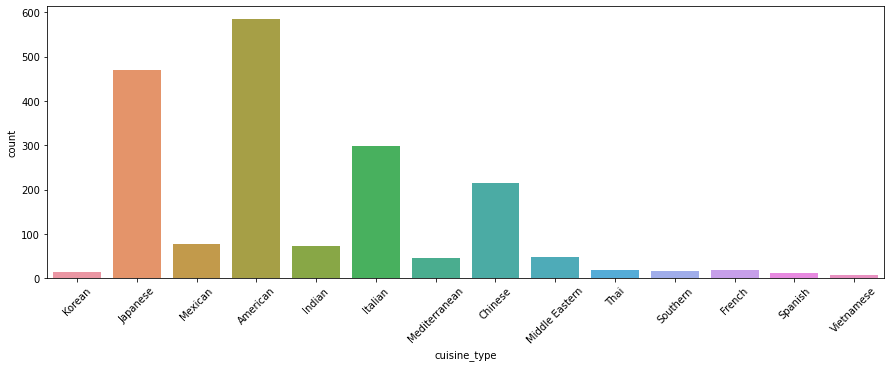

In [17]:
# determine the number of orders per cuisine
# set figure (chart) size
plt.figure(figsize = (15,5))

# draw countplot
cuisine_plot = sns.countplot(data = df, x = 'cuisine_type');

# rotate x axis labels 45 degrees
cuisine_plot.set_xticklabels(cuisine_plot.get_xticklabels(), rotation = 45);


###Observations


*   There are 14 unique cuisine types.
*   American cuisine has the greatest number of orders. 
*   American, Japanese, Italian, and Chinese are the most popular cuisines.
*   Vietnamese cuisine is the least popular.





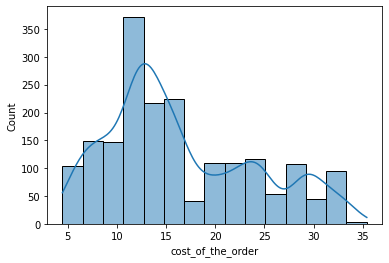

In [18]:
# explore order cost
# draw hisotgram with kernel density estimation 
sns.histplot(data = df, bins = 15, x = 'cost_of_the_order', kde = True);

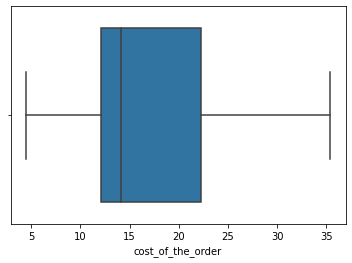

In [19]:
# draw boxplot to check distribution
sns.boxplot(data = df, x = 'cost_of_the_order');

In [20]:
# explore Order Cost
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

###Observations
*   The histogram and boxplot shows a right-skewed distribution.
*   The boxplot shows the median order cost to be 14.
*  There are no outliers in the order cost data set.
* The highest order cost is 35.41.
*   The lowest order cost is 4.47.
*   The average order cost is 16.50.
*   The highest frequency of orders cost approximately 12 dollars.
*  Students are one of the main target markets and likely the cause of the largest left peak.











In [21]:
# explore Day of the Week and check the number of unique values
df['day_of_the_week'].nunique()

2

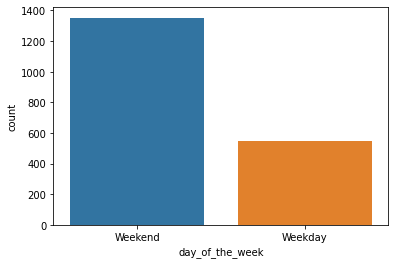

In [22]:
# draw countplot to explore the categorical data 
sns.countplot(data = df, x = 'day_of_the_week');

###Observations

*   There are 2 unique values representing weekday and weekend.
*   There are more orders on the weekend than on weekdays.



In [23]:
# explore Rating and check the number of unique values
df['rating'].nunique()

4

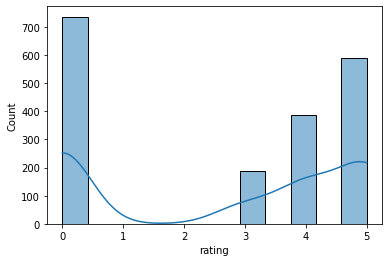

In [24]:
# draw histogram for rating
sns.histplot(data = df, x ='rating', kde = True);

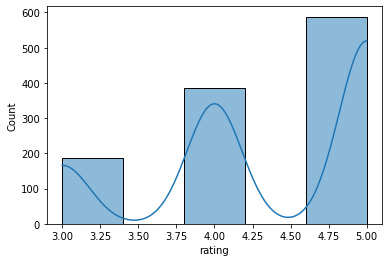

In [25]:
# eliminate unrated rows
rating_data = df[df['rating'] != 0]

# draw new histogram with rating_data set
sns.histplot(data = rating_data, bins = 5, x ='rating', kde = True);

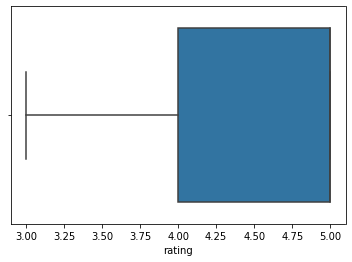

In [26]:
# draw boxplot to check the distribution of the rating_data set
sns.boxplot(data = rating_data, x='rating');

###Observations

*   There are 4 unique values.
*   The rating with the highest count is "not given."
*   The 'not given' category was skewing results. Eliminating it had the following effects:
*   The boxplot shows left-skewed distribution.
*   The rating with the lowest count is '3.'
*  There are no outliers.







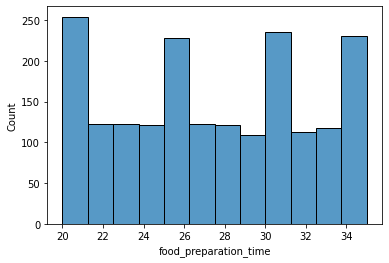

In [27]:
# explore Food Preparation Time
# draw histogram to explore the numerical data
sns.histplot(data = df, x = 'food_preparation_time');

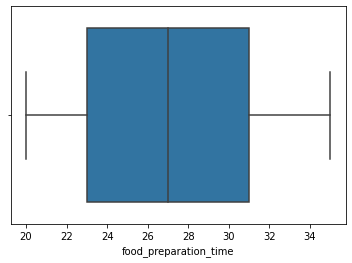

In [28]:
# draw  boxplot to check the distribution of preparation time
sns.boxplot(data = df, x = 'food_preparation_time');

In [29]:
# explore food preparation time
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

###Observations


*   Food preparation time is approximately normally distributed.
*   There are no outliers in the data set.
*   There is no missing data.
*   The average food preparation time is 27.37 minutes.
*  The minimum food preparation time is 20 minutes.
* The maximum food preparation time is 35 minutes.






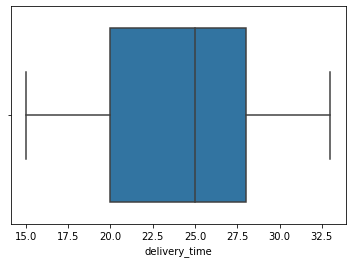

In [30]:
# explore Delivery Time
#draw boxplot to check distribution
sns.boxplot(data = df, x = 'delivery_time');

In [31]:
#Check unique values
df['delivery_time'].nunique()

19

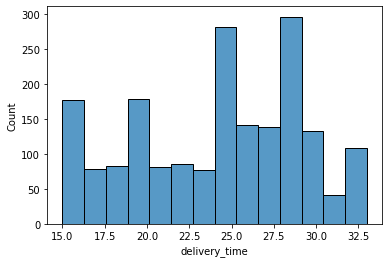

In [32]:
#Draw histogram
sns.histplot(data = df, x = 'delivery_time');

In [33]:
# explore the delivery time data set
df['delivery_time'].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

###Observations
*   The data set is approximately normally distributed.
*   There are no outliers in the data set.
*   There are 19 unique values for delivery time.
*   The greatest number of orders fall between a delivery time of approximately 24 to 30 minutes.
*  There are no missing values in the data set. 
*   The average delivery time is 24.16 minutes
*   The minimum delivery time is 15 minutes.
*   The maximum delivery time is 33 minutes.
*   75% of all orders are delivered between 15 to 28 minutes.









### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [34]:
# draw information from restaurant name and order ID columns, count number of orders per restaurant then put orders in descending order and finally, display the top 5 results
df[['restaurant_name', 'order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id', ascending = False).head()

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
*   Shake Shack has the most orders with 219.
*   The Meatball Shop has 132 orders while Blue Ribbon Sushi has 119. 
* Blue Ribbon Fried Chicken has 96 orders, and Parm has 68 orders. 





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [35]:
# show only weekend and group by cuisine
# count order IDs for cuisine types, sort in descending order, and limit results to top 5
df[df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id', ascending = False).head()


,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
*   American cuisine is the most popular weekend cuisine with 415 orders. 



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [36]:
# count total order observations and print results
total_orders = df['cost_of_the_order'].count()
print('There are', total_orders, 'order observations.')

# count orders greater than $20 and print results
greater_than_20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
print('There are', greater_than_20, 'orders greater than $20.')

# find percentage of orders greater than $20 and print result rounded to two decimal places
percentage = round((greater_than_20/total_orders)*100,2)
print('The percentage of orders greater than $20 is', percentage)


There are 1898 order observations.
There are 555 orders greater than $20.
The percentage of orders greater than $20 is 29.24


#### Observations:
*   29.24% of orders cost more than $20.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [37]:
# find the average mean delivery time
mean_delivery_time = df['delivery_time'].agg('mean')

# print mean delivery time rounded to two decimal places
print('The mean delivery time is', round(mean_delivery_time, 2), 'minutes.')

The mean delivery time is 24.16 minutes.


#### Observations:
*   On average, it takes 24.16 minutes to deliver an order.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [38]:
# draw information from order ID and customer ID columns, count orders per customer and sort by highest count descending
# output top 3 results
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id', ascending=False).head(3)

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
*  The top 3 most frequent customers are customer IDs 52832, 47440, and 83287. 
* They have placed 13, 10, and 9 orders each. 




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


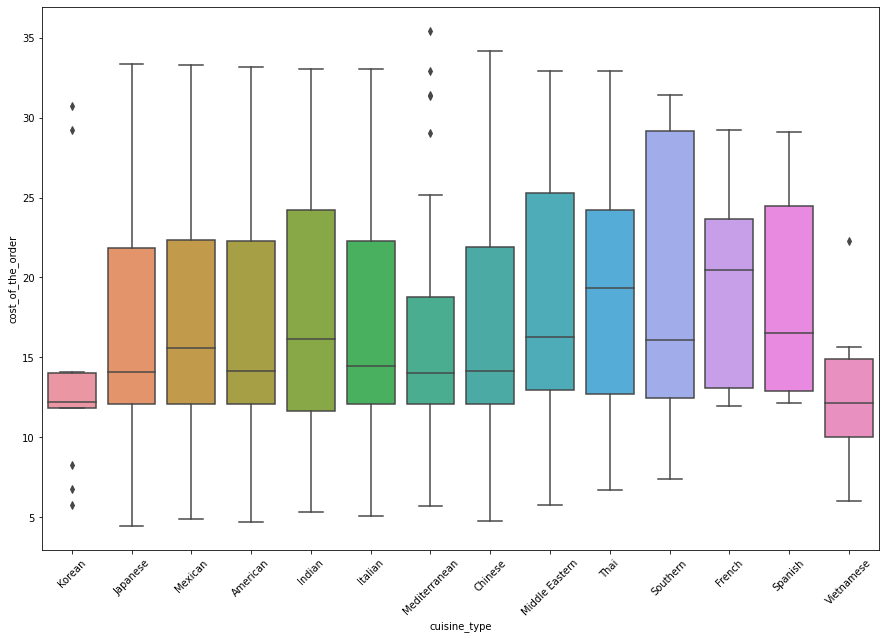

In [39]:
# draw boxplot to compare relationship between cuisine type and order cost
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")

# rotate x axis labels 45 degrees
plt.xticks(rotation = 45)
plt.show()

####Observations:

*   Order cost and cuisine type is skewed differently across the board. 
* A few cuisines have outliers: Korean, Mediterranean, and Vietnamese.





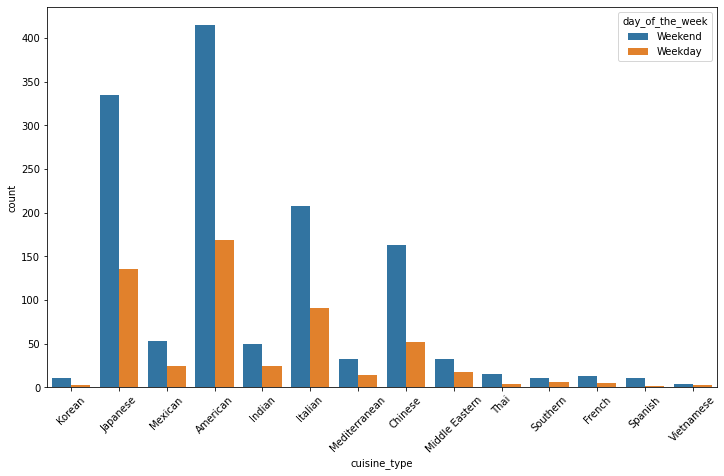

In [40]:
# draw countplot to compare the relationship between cusine type and day of the week
plt.figure(figsize=(12,7))
sns.countplot(data = df, x='cuisine_type', hue ='day_of_the_week')

# rotate x axis labels
plt.xticks(rotation = 45)
plt.show()

####Observations:
*   Cuisine popularity is matched on both weekends and weekdays.



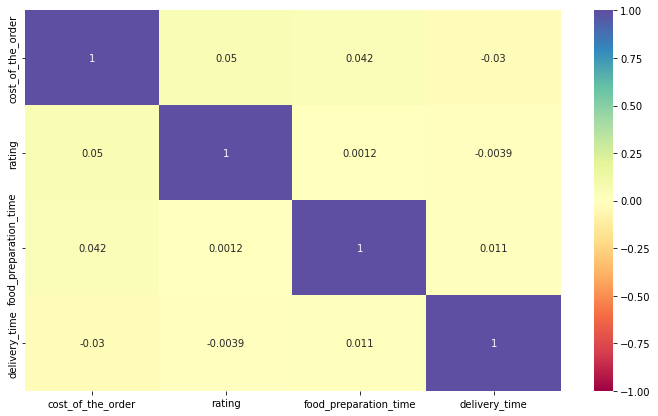

In [41]:
# draw correlation heatmap 
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

####Observations:

*   The heatmap does not show any correlations of significance.



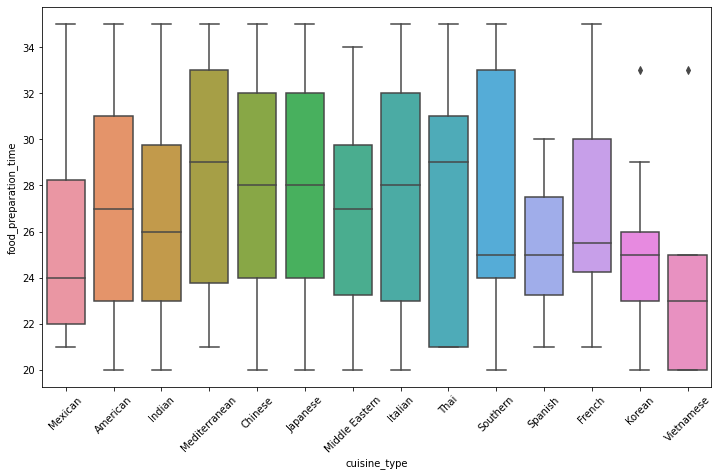

In [42]:
# draw boxplot to determine relationship between cuisine type and food preparation time
plt.figure(figsize=(12,7))

# use rating_data set eliminate unrated orders and bias
sns.boxplot(data = rating_data, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation = 45)
plt.show()

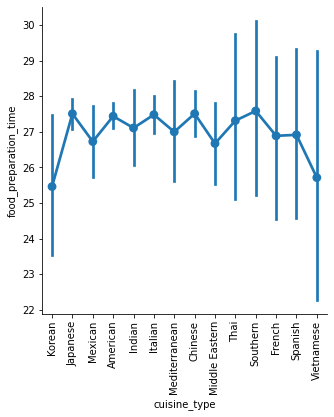

In [43]:
# draw catplot to determine relationship between food preparation time and cuisine type
sns.catplot(data = df, x='cuisine_type', y = 'food_preparation_time', kind='point')

# rotate x axis labels
plt.xticks(rotation = 90)
plt.show()

####Observations:
*   Most cuisines have the same food preparation time.
*   Some cuisines have a larger spread over the confidence interval (95%). 





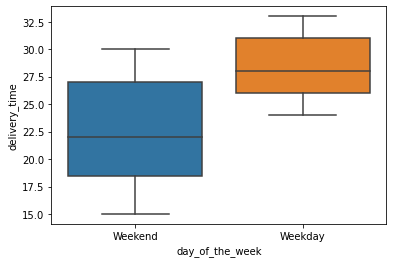

In [44]:
# draw boxplot to compare the relationship between day of the week and delivery time
sns.boxplot(data = df, x='day_of_the_week', y = 'delivery_time')
plt.show()

####Observations:
*  Delivery time increases on the weekdays. 
*  The median delivery time on weekends is approximately 22.5 minutes.
*   The median delivery time on weekdays is approximately 28.5 minutes.




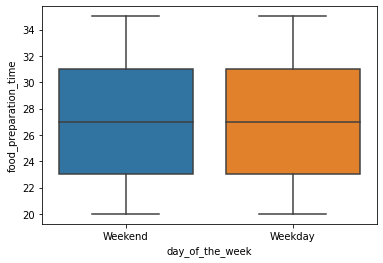

In [45]:
# draw boxplot to compare the relationship between day of the week and food preparation time
sns.boxplot(data = df, x='day_of_the_week', y= 'food_preparation_time')
plt.show()

####Observations:
*   There is no difference between food preparation time and the day of the week.



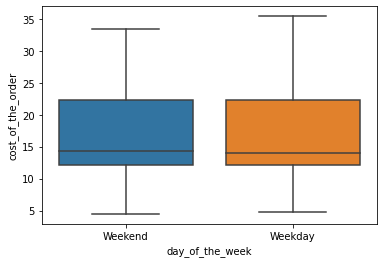

In [46]:
# draw boxplot to compare order cost and day of the week
sns.boxplot(data = df, x='day_of_the_week', y='cost_of_the_order')
plt.show()

####Observation:
*   There is no difference between order cost and the day of the week.

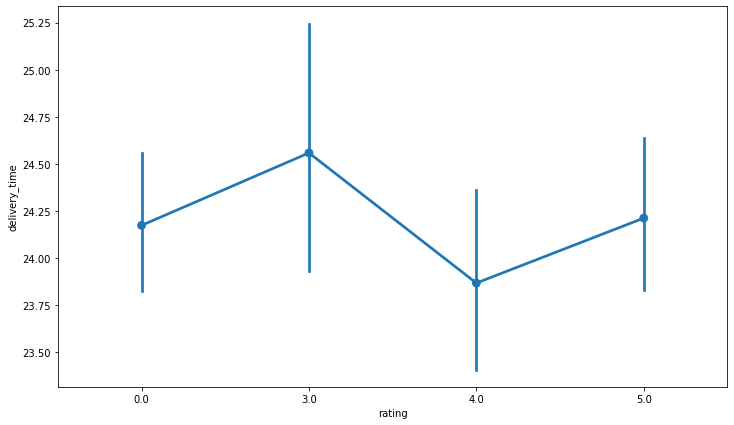

In [47]:
# draw pointplot to compare the relationship between rating and delivery time
plt.figure(figsize=(12, 7))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time')
plt.show()

####Observations:
*   There is a slight correlation beween delivery time and rating. 
* The higher the delivery time, the lower the rating. However, there is an anomoly at rating 5 where delivery time is higher than those that fall in the 4 category.



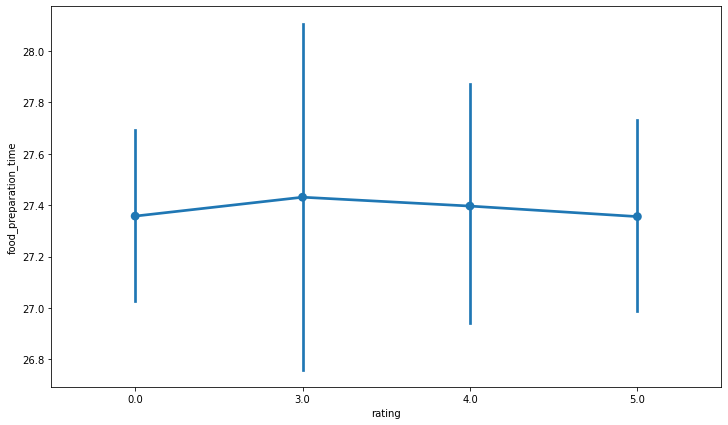

In [48]:
# draw pointplot to compare the relationship between rating and food preparation time
plt.figure(figsize=(12, 7))
sns.pointplot(data = df, x='rating', y='food_preparation_time')
plt.show()

####Observations:
* Rating is not affected by food preparation time.
* The greatest spread across the 95% confidence interval occurs at rating 3.

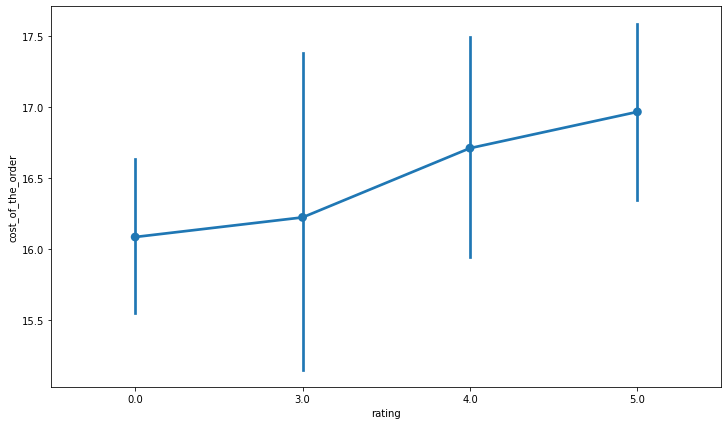

In [49]:
# draw pointplot to compare the relationship between rating and cost of the order
plt.figure(figsize=(12, 7))
sns.pointplot(data=df, x='rating',y='cost_of_the_order')
plt.show()

####Observations
* There is a slight positive correlation between rating and order cost. 
* The higher the order cost, the higher the rating value. 
* The greatest spread across the 95% confidence interval occurs at rating 3.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [50]:
# eliminate unrated rows and creat data set with mean rating greater than 4
mean_4 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').mean()> 4  

# index reset
mean_4.reset_index(inplace=True)

# eliminate unrated orders and create data set with rating count greater than 50
rating_50 = df[['restaurant_name','rating']][df['rating']!= 0].groupby('restaurant_name').count()> 50

# index reset
rating_50.reset_index(inplace=True)

# merge to create new data set with restaurants that meet both mean greater than 4 and rating count greater than 50
qualified_restaurants = pd.merge(rating_50[rating_50['rating']== True], mean_4[mean_4['rating']== True],on ='restaurant_name')

# return the new data set
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations: 

Four restaurants qualify for the promotional offer: 

1.   Blue Ribbon Fried Chicken
2.   Blue Ribbon Sushi
3.   Shake Shack
4.   The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [51]:
# create new variables for total revenue and income
revenue = 0
income = 0

# create new Pandas series for order cost
order_cost = pd.Series(df['cost_of_the_order'])

# run loop for series cost to calculate income 
for i in range(len(order_cost)):
    if (order_cost[i] > 5) & (order_cost[i] < 20):
        income = order_cost[i]*0.15
    elif (order_cost[i] > 20):
        income = order_cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

# print results rounded to two decimal places 
print('The net revenue generated is:',round(revenue,2))

The net revenue generated is: 6166.3


#### Observations: 

* FoodHub generated a net revenue of $6,166.30.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [52]:
# create new column, total_time, for df that includes preparation and delivery times
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# check for new column addition
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,0.0,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,0.0,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [53]:
# find percentage of orders that take more than 60 minutes
order_count = df['total_time'].count()
order_60 = df['total_time'][df['total_time']> 60].count()

percent_60 = round((order_60 / order_count)*100,2)

# return pecentage over 60
percent_60

10.54

#### Observations: 

* Approximately 10.54% of orders take more than 60 minutes to prepare and deliver.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [54]:
# print mean delivery time on weekdays
print('The mean delivery time on weekdays is approximately', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes.')

# print mean delivery time on weekends
print('The mean delivery time on weekends is approximately', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes.')

The mean delivery time on weekdays is approximately 28 minutes.
The mean delivery time on weekends is approximately 22 minutes.


#### Observations: 

* The mean delivery time on weekdays is approximately 28 minutes, while the mean delivery time on weekends is approximately 22 minutes.

* Overall, the mean delivery time is shorter on the weekends despite the increased order count. 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. Preparation time remains consistent regardless of weekend or weekday. Delivery time flucuates depending on weekend or weekday. This flucuation affects the total time which combines preparation time and delivery time. 

2.  Around 38% of rating data is unknown or not given. When unrated orders are eliminated, ratings concentrate at the rating of 5.  This leads me to believe it is likely highly satisfied customers are more likely to rate their order than those who are slightly less satisfied. 

3. There is a slight positive correlation between rating and order cost. When the cost of the order is high, so is the rating. This could have to do with superior quality cuisine costing more per order which in turn receives a higher rating.

4. Order cost is bimodal. It peaks at approximately 13 dollars and again at 25 dollars. This is likely due to the two target markets, students and working professionals.

5. Demand increases evenly across all cuisines on the weekend, and popularity distribution across all cuisines remains the same on both weekdays and weekends. 

6. There are only 1,898 orders in the data set and 1,200 unique customers. FoodHub has a lot of room to improve its repeat customer base and maximize its revenue potential.


### Recommendations:

1. A deep dive into order delivery time on weekdays is needed to lower total order time. Some areas to explore include:
    *   The number of delivery drivers on weekends vs. weekdays
    *   Traffic patterns on weekdays vs. weekends

2. Reduce the number of unrated orders. This is an opportunity to offer customers an incentive to rate Foodhub's service. This could come in the form of a flier with the order and a follow-up email or automated SMS message. 

3. Find a way to increase the number of more expensive cuisines offered or increase the number of restaurants opffering premium, higher-priced cuisine.

4. Differentiating the target markets would help in longterm marketing communications. The bimodal representation of order cost implies a differentiation of students at the 13 dollar peak and working professionals at the 25 dollar peak. 

5. The consistency of cuisine popularity distribution can help drive marketing communications to increase weekday sales. The distribution is also an indication of the likely success of new restaurants looking to use FoodHub's service based on cuisine type served. 

6. FoodHub can expand its promotional efforts. Instead of offering a 20% voucher to its top 3 repeat customers, it could start a reward program incentivizing repeat purchases from every customer beginning with their first point-of-sale encounter. 

---